In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/exams.csv')

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['math score', 'reading score', 'writing score'])
y = df[['math score', 'reading score', 'writing score']]

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for Math: {mse[0]:.2f}")
print(f"Mean Squared Error for Reading: {mse[1]:.2f}")
print(f"Mean Squared Error for Writing: {mse[2]:.2f}")

# Plotting predicted vs actual values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

Mean Squared Error for Math: 166.45
Mean Squared Error for Reading: 156.52
Mean Squared Error for Writing: 162.98


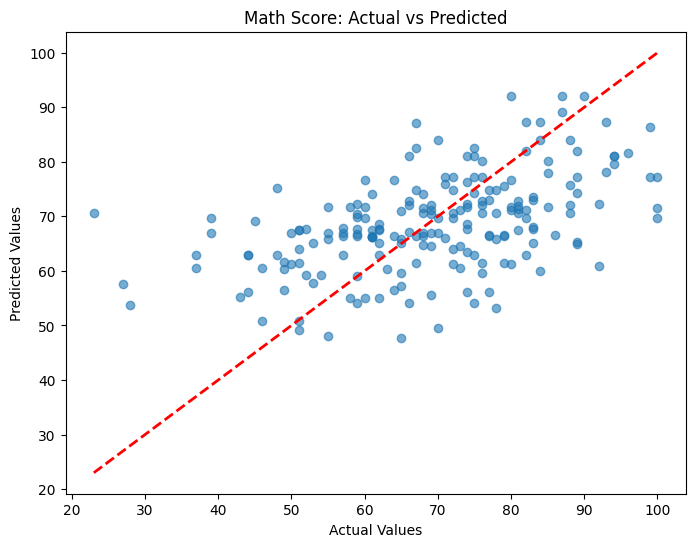

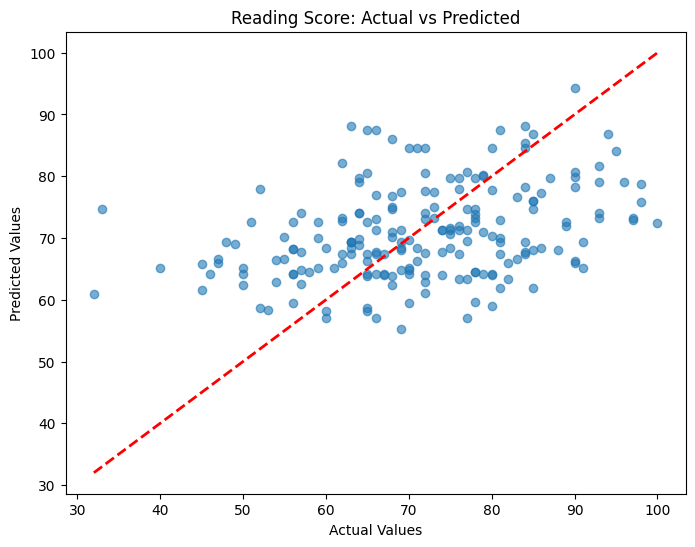

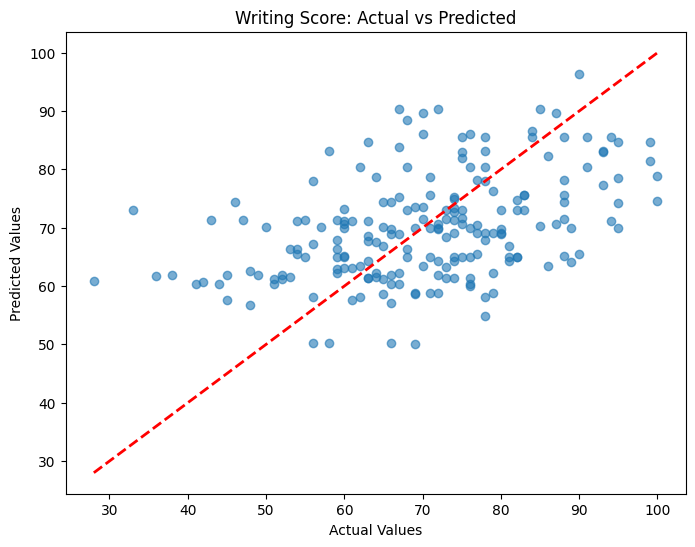

In [2]:

# Math score plot
plot_predictions(y_test['math score'], y_pred[:, 0], 'Math Score: Actual vs Predicted')

# Reading score plot
plot_predictions(y_test['reading score'], y_pred[:, 1], 'Reading Score: Actual vs Predicted')

# Writing score plot
plot_predictions(y_test['writing score'], y_pred[:, 2], 'Writing Score: Actual vs Predicted')
